In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load the dataset
file_path = 'Amazon Sale Report.csv'  # Ensure the file is in the same directory
df = pd.read_csv(file_path, low_memory=False)

In [7]:
# Display basic information about the dataset
print("\n--- Data Overview ---")
df.info()
print(df.head())


--- Data Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount     

In [8]:
# Convert 'Date' column to datetime format with specified format to avoid warnings
date_formats = ['%Y-%m-%d', '%d-%m-%Y', '%m/%d/%Y']
for fmt in date_formats:
    try:
        df['Date'] = pd.to_datetime(df['Date'], format=fmt, errors='coerce')
        if df['Date'].notna().sum() > 0:
            break
    except ValueError:
        continue

In [9]:
# Handle missing values in key columns
df = df.assign(**{
    'Courier Status': df['Courier Status'].fillna('Unknown'),
    'Amount': df['Amount'].fillna(0),
    'fulfilled-by': df['fulfilled-by'].fillna('Unknown')
})

In [10]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 22'], inplace=True, errors='ignore')

In [11]:
# Analyze top-selling products
top_selling_skus = df.groupby('SKU')['Qty'].sum().sort_values(ascending=False).head(10)
print("\n--- Top Selling Products ---")
print(top_selling_skus)



--- Top Selling Products ---
SKU
JNE3797-KR-L       661
JNE3797-KR-M       561
JNE3797-KR-S       503
JNE3405-KR-L       485
J0230-SKD-M        468
J0230-SKD-S        421
JNE3797-KR-XL      415
JNE3405-KR-S       399
JNE3797-KR-XS      386
SET268-KR-NP-XL    373
Name: Qty, dtype: int64


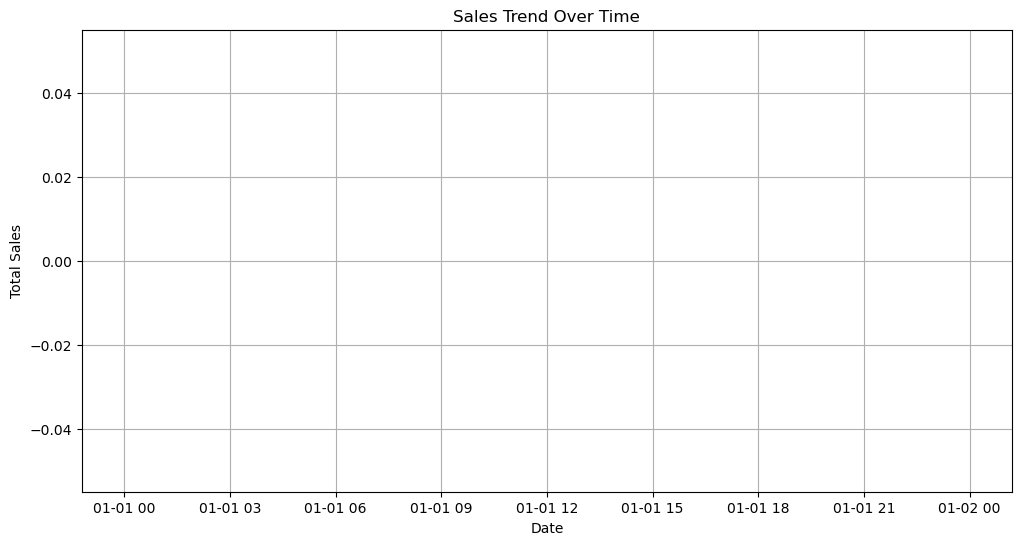

In [12]:

# Plot sales trend over time
sales_trend = df.groupby('Date')['Amount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_trend, marker='o', color='b')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

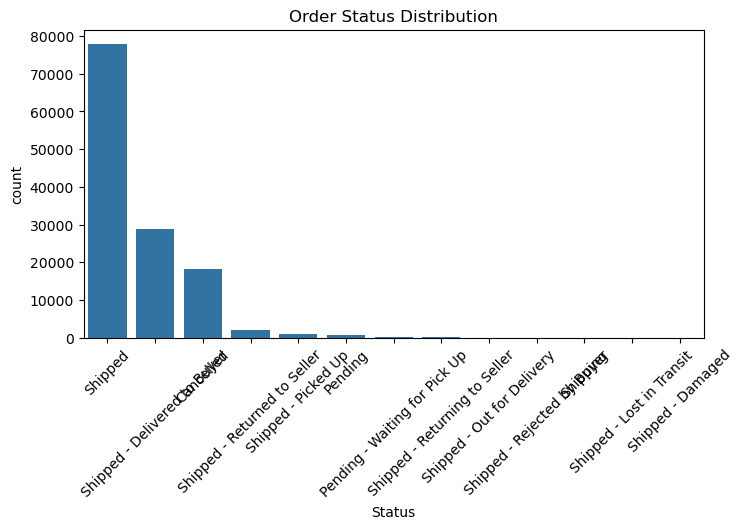

In [13]:
# Visualize order status distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Status', data=df, order=df['Status'].value_counts().index)
plt.title('Order Status Distribution')
plt.xticks(rotation=45)
plt.show()



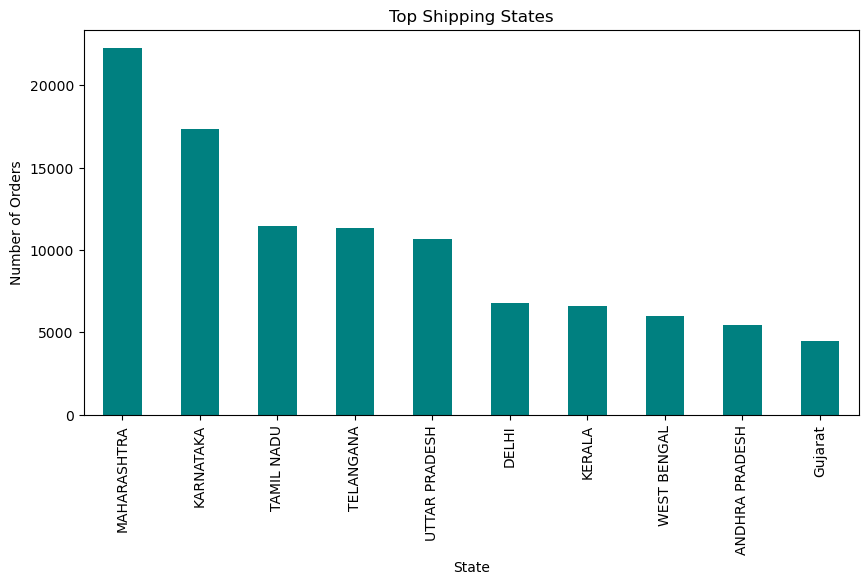

In [14]:
# Analyze top shipping destinations
top_states = df['ship-state'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_states.plot(kind='bar', color='teal')
plt.title('Top Shipping States')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.show()

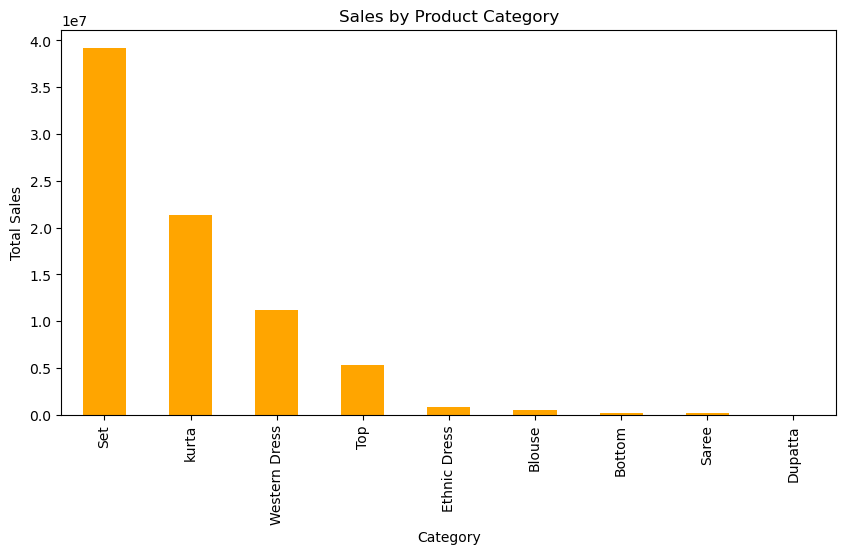

In [15]:
# Sales performance by category
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
category_sales.plot(kind='bar', color='orange')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

In [19]:
# Monthly sales trend
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Amount'].sum()
plt.figure(figsize=(12, 6))
if not monthly_sales.empty:
    monthly_sales.plot(kind='line', marker='o', color='green')
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.grid()
    plt.show()
else:
    print("No monthly sales data available to plot.")

No monthly sales data available to plot.


<Figure size 1200x600 with 0 Axes>

In [21]:
# Summary statistics
print("\n--- Sales Summary Statistics ---")
print(df[['Qty', 'Amount']].describe())


--- Sales Summary Statistics ---
                 Qty         Amount
count  128975.000000  128975.000000
mean        0.904431     609.363662
std         0.313354     313.347147
min         0.000000       0.000000
25%         1.000000     413.000000
50%         1.000000     583.000000
75%         1.000000     771.000000
max        15.000000    5584.000000


In [22]:
# Save cleaned data for further analysis
df.to_csv('Cleaned_Amazon_Sale_Report.csv', index=False)
print("\nCleaned data saved successfully!")



Cleaned data saved successfully!
